In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 7.7 MB/s 
     |████████████████████████████████| 4.9 MB 41.4 MB/s 
     |████████████████████████████████| 1.3 MB 45.7 MB/s 
     |████████████████████████████████| 365 kB 62.0 MB/s 
     |████████████████████████████████| 212 kB 57.5 MB/s 
     |████████████████████████████████| 120 kB 45.3 MB/s 
     |████████████████████████████████| 115 kB 58.2 MB/s 
     |████████████████████████████████| 127 kB 58.4 MB/s 
     |████████████████████████████████| 6.6 MB 45.3 MB/s 
Mounted at /content/gdrive


In [ ]:
#!<rm -rf aviones

In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
with open('API_KEY.txt') as f:
    lines = f.readlines()

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', lines[0])

In [ ]:
results = search_images_bing(key, 'bf 109')
ims = results.attrgot('contentUrl')
len(ims)
ims[0]

'https://aeropedia.com.au/wp-content/uploads/2019/05/Messerschmitt-Bf-109_Aeropedia-The-Encyclopedia-of-Aircraft.jpg'

In [ ]:
planes_types = 'messerschmitt 109','focke wulf 190','messerschmitt 263 komet'
path = Path('planes')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in planes_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} plane')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
fns = get_image_files(path)
fns

(#435) [Path('planes/messerschmitt 109/2d96eecc-17ec-4877-a855-dc12a587c3d5.jpg'),Path('planes/messerschmitt 109/6ef97bb7-f91b-4757-8cd0-f03d6ed47e2e.jpg'),Path('planes/messerschmitt 109/6f42ac51-c74f-40c3-9a92-bae2ab587980.jpg'),Path('planes/messerschmitt 109/818c288b-1f8c-48ae-9467-044f62d85b43.png'),Path('planes/messerschmitt 109/b86dc88f-a98c-4d0f-a028-1bbe23bef242.jpeg'),Path('planes/messerschmitt 109/1702df68-c4e1-48e7-8d89-656492ae2945.jpg'),Path('planes/messerschmitt 109/fd656380-8ce6-4c08-ae3e-f4d59bb6be9e.jpg'),Path('planes/messerschmitt 109/053d70e9-41ed-45de-bb9f-292461f05f3f.jpg'),Path('planes/messerschmitt 109/0e8b00ce-643c-4f31-92a0-b3d7c762bfc3.jpg'),Path('planes/messerschmitt 109/4d54bfc4-f50f-43ae-9cca-15f1d91add58.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#3) [Path('planes/focke wulf 190/815a567c-776c-473e-a546-ecabcd58ff03.jpg'),Path('planes/messerschmitt 263 komet/b17880e9-8812-4ef9-9ff8-ad3e3ea29216.jpg'),Path('planes/messerschmitt 263 komet/3e62141a-85d2-43af-8992-fb9507e6d424.jpg')]

In [ ]:
failed.map(Path.unlink);

In [ ]:
planes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = planes.dataloaders(path)

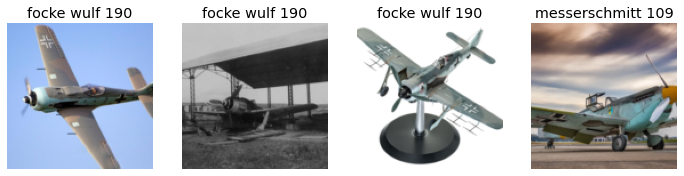

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

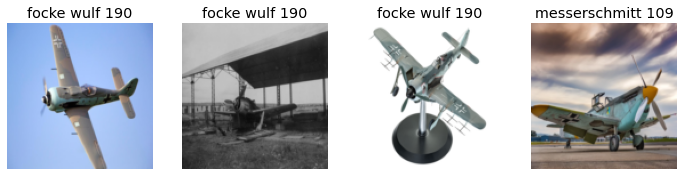

In [ ]:
planes = planes.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = planes.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

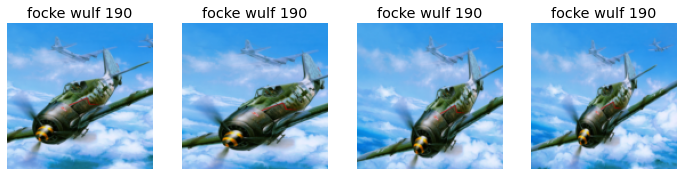

In [ ]:
planes = planes.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = planes.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

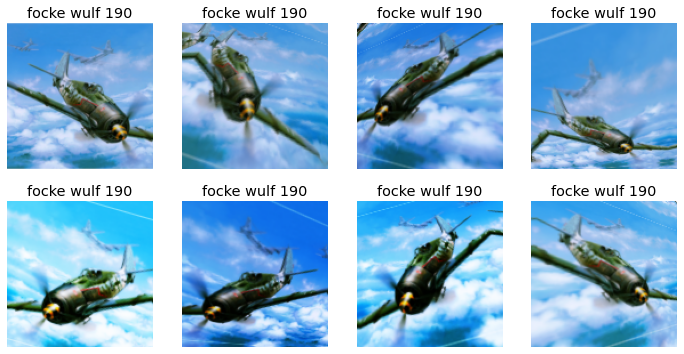

In [ ]:
planes = planes.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = planes.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
planes = planes.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = planes.dataloaders(path)

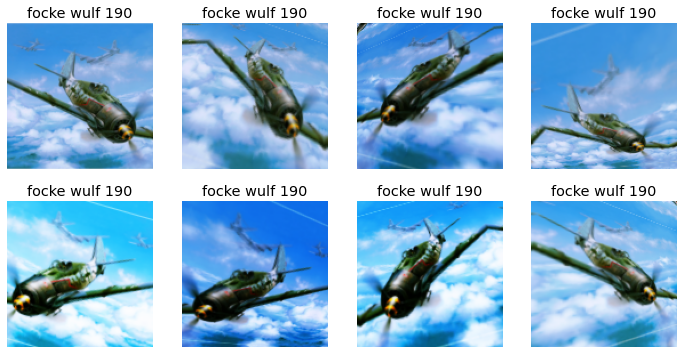

In [ ]:
planes = planes.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = planes.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.783457,1.529289,0.458824,00:38


epoch,train_loss,valid_loss,accuracy,time
0,1.372817,1.255551,0.423529,00:43
1,1.365010,1.146029,0.517647,00:42
2,1.322748,1.051858,0.541176,00:39
3,1.233336,0.995840,0.611765,00:39
4,1.139931,0.880254,0.694118,00:41
5,1.066795,0.901054,0.705882,00:41
6,1.018017,0.876576,0.705882,00:39
7,0.949191,0.850913,0.694118,00:39
8,0.889982,0.858703,0.705882,00:39
9,0.846523,0.851996,0.694118,00:41


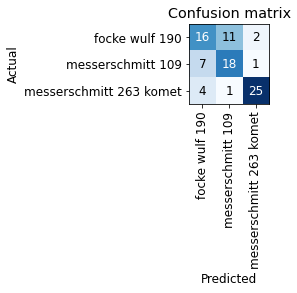

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

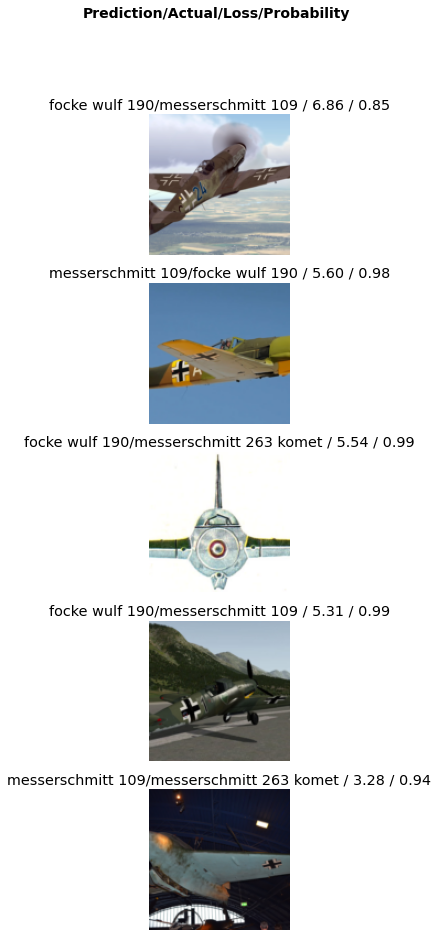

In [ ]:
interp.plot_top_losses(5, nrows=5)

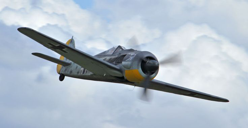

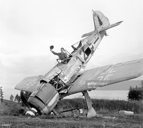

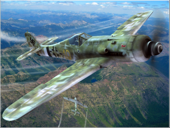

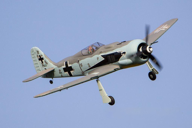

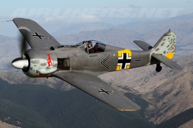

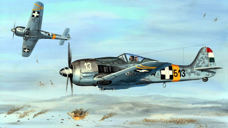

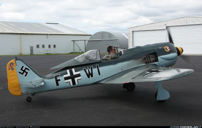

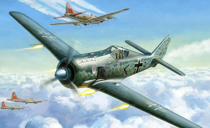

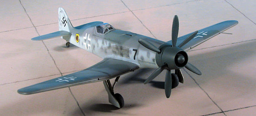

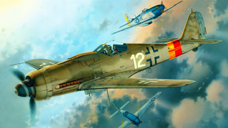

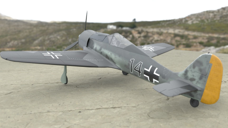

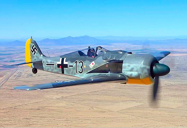

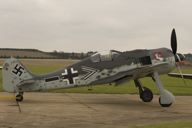

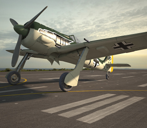

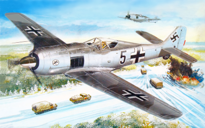

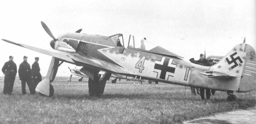

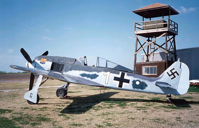

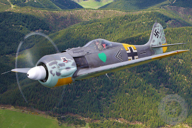

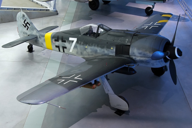

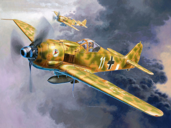

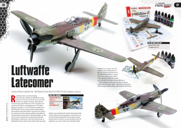

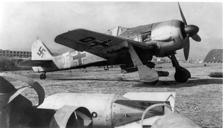

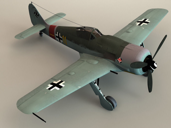

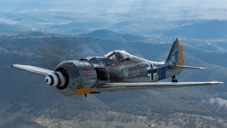

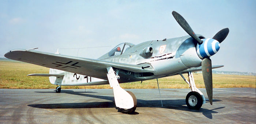

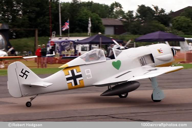

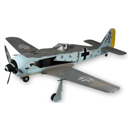

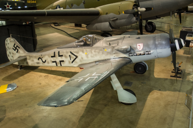

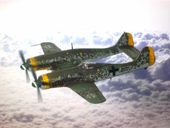

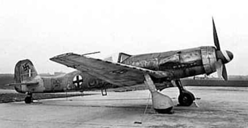

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
#So, for instance, to delete (`unlink`) all images selected for deletion, we would run:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
#To move images for which we've selected a different category, we would run:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
#btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

IndexError: ignored

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#hide_output
VBox([widgets.Label('Select your plane!'), 
      btn_upload, btn_run, out_pl, lbl_pred])